In [1]:
%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from time import sleep
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from typing import List
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
import sys
import ta
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch
import pathlib
from time import time
import random

random_state = 43
sns.set_theme()

torch.cuda.empty_cache()

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda:0


In [3]:
from dataloaders.loader_m4 import download_and_parse_dataset

In [4]:
path = download_and_parse_dataset(force_download=True)
path

PosixPath('/mnt/f/Code/HSE-CS-Courses/courses/Diploma/src/data/m4/dataset.pickle')

In [5]:
# data
with open(path, "rb") as f:
    dataset = pickle.load(f)
dataset

{'Y1': {'train': array([5172.1, 5133.5, 5186.9, 5084.6, 5182. , 5414.3, 5576.2, 5752.9,
         5955.2, 6087.8, 6238.9, 6317.2, 6262.7, 6361. , 6427.4, 6654.9,
         6835.4, 6925.5, 7073.5, 7144. , 7230.6, 7349.6, 7339.2, 7250.8,
         7294.6, 7393.9, 7560.9, 7651.4, 7587.3, 7530.5, 7261.1]),
  'test': array([7290.2, 7392.6, 7527.6, 7594.8, 7720.7, 7823.2]),
  'meta': {'data_category': 'Macro',
   'period': 'Yearly',
   'date_start': '01-01-79 12:00',
   'seasonality_period': 1,
   'period_weight': 0.7246376811594203},
  'submissions': {'Naive': array([7261.1, 7261.1, 7261.1, 7261.1, 7261.1, 7261.1]),
   'Naive2': array([7261.1, 7261.1, 7261.1, 7261.1, 7261.1, 7261.1]),
   'sNaive': array([7261.1, 7261.1, 7261.1, 7261.1, 7261.1, 7261.1])}},
 'Y2': {'train': array([2070., 2104., 2394., 1651., 1492., 1348., 1198., 1192., 1105.,
         1008.,  994., 1420., 1582., 1286., 1133., 1322., 1157., 1244.,
         1843., 1794., 1426., 1170., 1021.,  997., 1062., 1013.,  944.,
          8

In [6]:
# Mean length by period
lens = {
    "Yearly": [],
    "Monthly": [],
    "Quarterly": [],
    "Weekly": [],
    "Daily": [],
    "Hourly": [],
}
for k, v in dataset.items():
    lens[v["meta"]["period"]].append(len(v["train"]))
for k, v in lens.items():
    lens[k] = np.array(v).mean()
lens = pd.Series(lens)
for elem in lens:
    print(elem)

31.32426086956522
216.30022916666667
92.2545
1022.0389972144847
2357.38301395789
853.864734299517


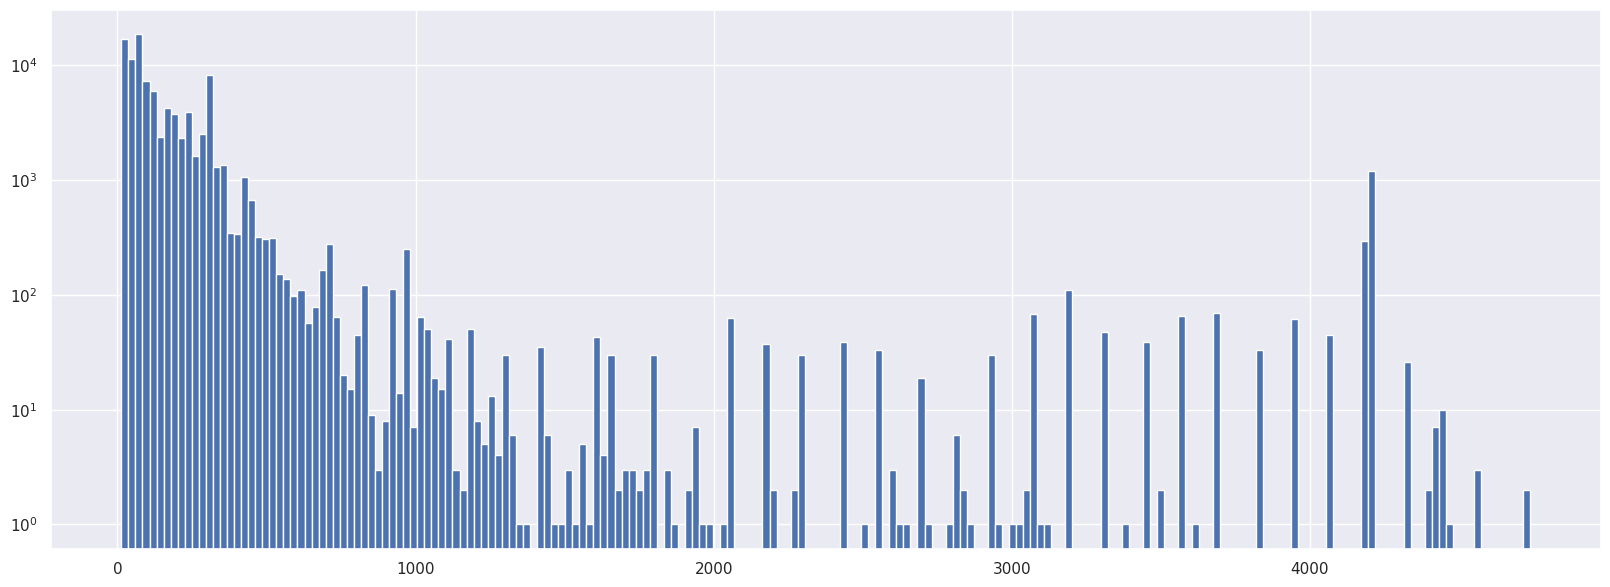

In [11]:
# Dataset lengths histogram
lens = np.array([len(v["train"]) for v in dataset.values()])
plt.figure(figsize=(20, 7))
plt.hist(lens[lens < 5000], bins=200)
plt.yscale("log")

In [12]:
# M4 info
pd.read_csv("../src/data/m4/raw/info.csv")

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00
2,Y3,Macro,1,6,Yearly,01-01-79 12:00
3,Y4,Macro,1,6,Yearly,01-01-79 12:00
4,Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,01-01-17 12:00
99996,H411,Other,24,48,Hourly,01-01-17 12:00
99997,H412,Other,24,48,Hourly,01-01-17 12:00
99998,H413,Other,24,48,Hourly,12-06-17 12:00


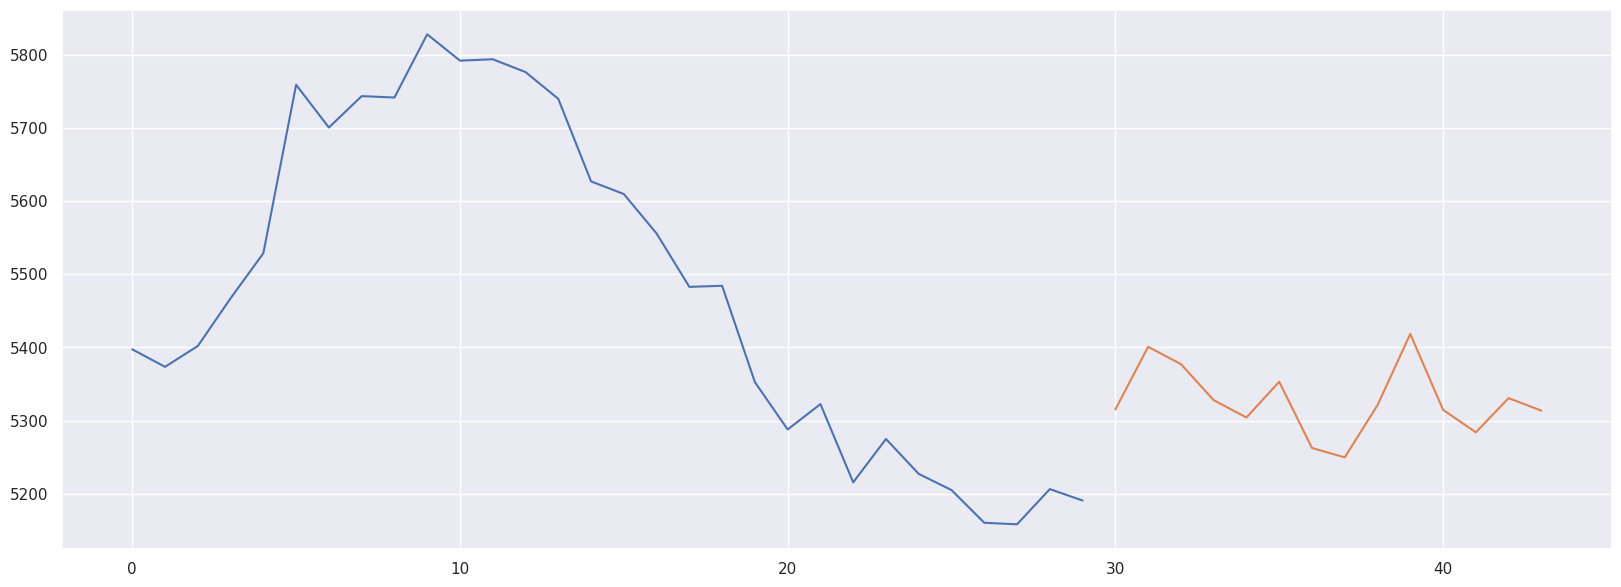

In [13]:
# Data example
plt.figure(figsize=(20, 7))

dataset_name = "D1310"

train_vals = np.array(dataset[dataset_name]["train"])[-30:]
test_vals = np.array(dataset[dataset_name]["test"])

plt.plot(np.arange(train_vals.shape[0]), train_vals)
plt.plot(np.arange(test_vals.shape[0]) + train_vals.shape[0], test_vals)

In [14]:
from trainer import train_models_and_compute_metrics

In [15]:
train_models_and_compute_metrics()